In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import os

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
   
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

s
Processing Record 34 of Set 3 | kamenka
Processing Record 35 of Set 3 | san borja
Processing Record 36 of Set 3 | nizhneyansk
City not found. Skipping...
Processing Record 37 of Set 3 | anadyr
Processing Record 38 of Set 3 | taltal
Processing Record 39 of Set 3 | bethel
Processing Record 40 of Set 3 | zyryanka
Processing Record 41 of Set 3 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 3 | qaanaaq
Processing Record 43 of Set 3 | gimbi
Processing Record 44 of Set 3 | pangai
Processing Record 45 of Set 3 | tiznit
Processing Record 46 of Set 3 | kipini
Processing Record 47 of Set 3 | teguise
Processing Record 48 of Set 3 | alta floresta
Processing Record 49 of Set 3 | kerman
Processing Record 50 of Set 3 | rantepao
Processing Record 1 of Set 4 | kaitangata
Processing Record 2 of Set 4 | tonantins
Processing Record 3 of Set 4 | faya
Processing Record 4 of Set 4 | entre rios
Processing Record 5 of Set 4 | port hardy
Processing Record 6 of Set 4 | changping
Processin

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kurilsk,50.68,156.12,50.81,88,0,0.45,RU,2020-07-07 15:01:12
1,Cassia,-20.58,-46.92,78.04,34,0,9.24,BR,2020-07-07 15:01:12
2,Rikitea,-23.12,-134.97,70.56,81,92,13.94,PF,2020-07-07 15:01:12
3,Arraial Do Cabo,-22.97,-42.03,77.00,69,20,8.05,BR,2020-07-07 15:01:12
4,Georgetown,5.41,100.34,77.00,94,40,2.24,MY,2020-07-07 15:01:12
5,Hobart,-42.88,147.33,39.20,80,17,11.41,AU,2020-07-07 15:00:14
6,Albany,42.60,-73.97,77.00,65,89,1.99,US,2020-07-07 15:00:55
7,Cherskiy,68.75,161.30,52.59,71,1,2.75,RU,2020-07-07 15:01:13
8,Esperance,-33.87,121.90,55.40,66,90,8.05,AU,2020-07-07 15:01:13
9,Busselton,-33.65,115.33,48.99,98,10,10.92,AU,2020-07-07 15:01:14


In [8]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [9]:
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Severo-Kurilsk,RU,2020-07-07 15:01:12,50.68,156.12,50.81,88,0,0.45
1,Cassia,BR,2020-07-07 15:01:12,-20.58,-46.92,78.04,34,0,9.24
2,Rikitea,PF,2020-07-07 15:01:12,-23.12,-134.97,70.56,81,92,13.94
3,Arraial Do Cabo,BR,2020-07-07 15:01:12,-22.97,-42.03,77.00,69,20,8.05
4,Georgetown,MY,2020-07-07 15:01:12,5.41,100.34,77.00,94,40,2.24
5,Hobart,AU,2020-07-07 15:00:14,-42.88,147.33,39.20,80,17,11.41
6,Albany,US,2020-07-07 15:00:55,42.60,-73.97,77.00,65,89,1.99
7,Cherskiy,RU,2020-07-07 15:01:13,68.75,161.30,52.59,71,1,2.75
8,Esperance,AU,2020-07-07 15:01:13,-33.87,121.90,55.40,66,90,8.05
9,Busselton,AU,2020-07-07 15:01:14,-33.65,115.33,48.99,98,10,10.92


In [17]:
# Create the output file (CSV).
output_data_file = os.path.join("weather_data","cities.csv")
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

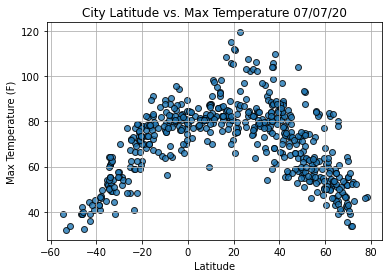

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
Fig1Out = os.path.join("weather_data","Fig1.png")
plt.savefig(Fig1Out)

# Show plot.
plt.show()

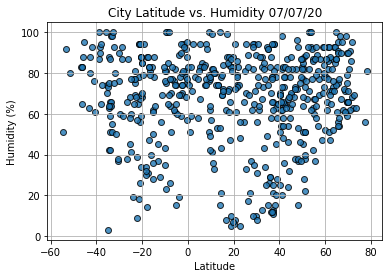

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
Fig2Out = os.path.join("weather_data","Fig2.png")
plt.savefig(Fig2Out)
# Show plot.
plt.show()

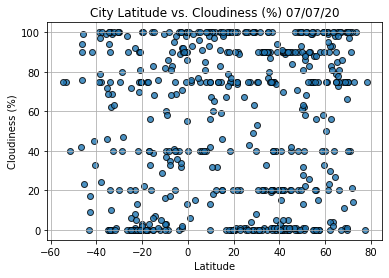

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
Fig3Out = os.path.join("weather_data","Fig3.png")
plt.savefig(Fig3Out)
# Show plot.
plt.show()

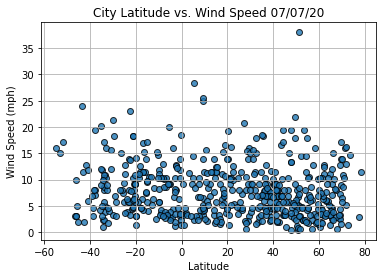

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
Fig4Out = os.path.join("weather_data","Fig4.png")
plt.savefig(Fig4Out)
# Show plot.
plt.show()